In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("final_netflix_imputed.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### data has been scrapped and imputed, we only need to do EDA and model building; also feature exttraction if possible

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# 7 rows are missing rating, just fill the most frequent

In [5]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [26]:
df.rating.fillna("TV-MA", inplace = True)

In [7]:
word = "d, e, r, e, k,  , l, e, e, ,,  , c, l, i, f,  , p, r, o, w, s, e"
new_val = ""


In [28]:
def improve(df, feature):
    l = []
    for i, x in enumerate(df[feature]):
        
        if len(x.split(",")) > 5:
            if len(x.split(",")[0]) == 1:
                #print(i, x)
                l.append(i)

    for j in l:
        dir_ = df.loc[j, feature] 
        #print(j, dir_)
        new_val = ""
        for k,x in enumerate(dir_):
            if k+1 != len(dir_):
                if x == ',' and dir_[k+1] == ',':
                    new_val += ','
                    #print("yes", end= "")
                elif x == ",": continue
                else:
                    new_val +=x
            else:
                new_val +=x

        df.loc[j, feature] = ", ".join("".join(new_val.split()).split(","))

improve(df, 'director')
improve(df, 'cast')

### **EDA**

In [7]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [8]:
from EDA import plot 
plot.ipynb_set()

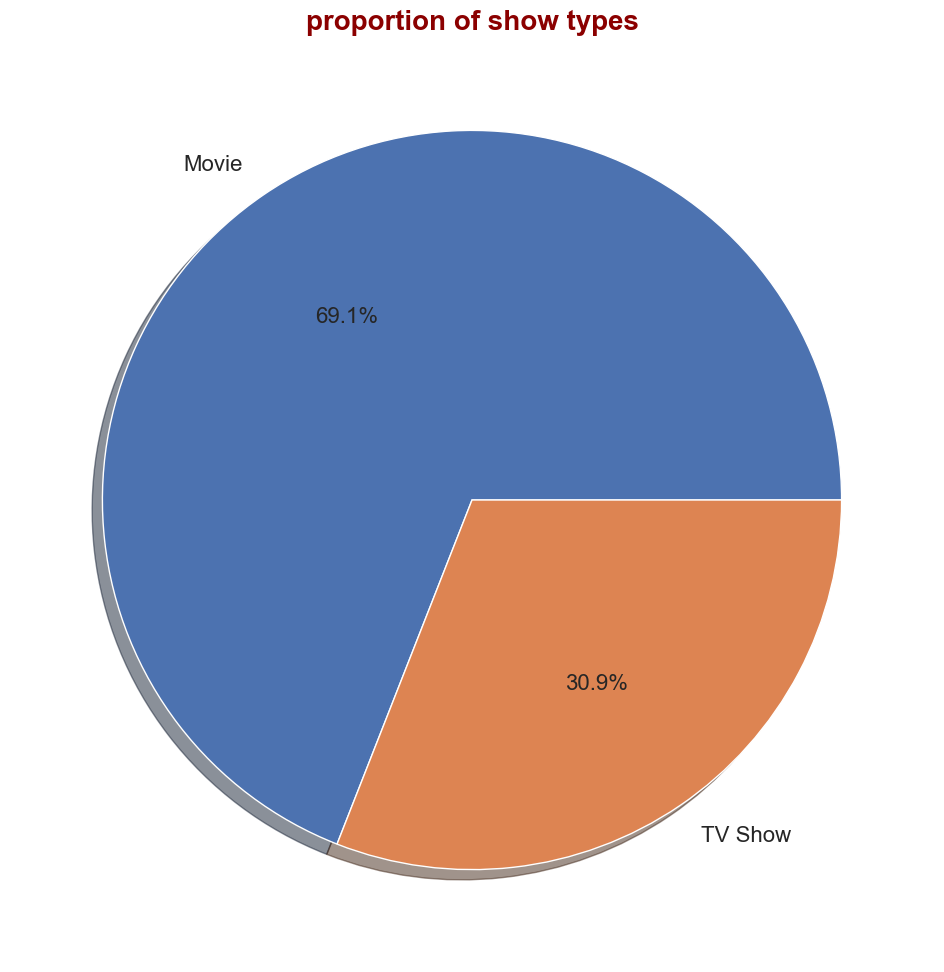

In [9]:
aux = df.type.value_counts()
plot.pie(aux, aux.index, 'proportion of show types')

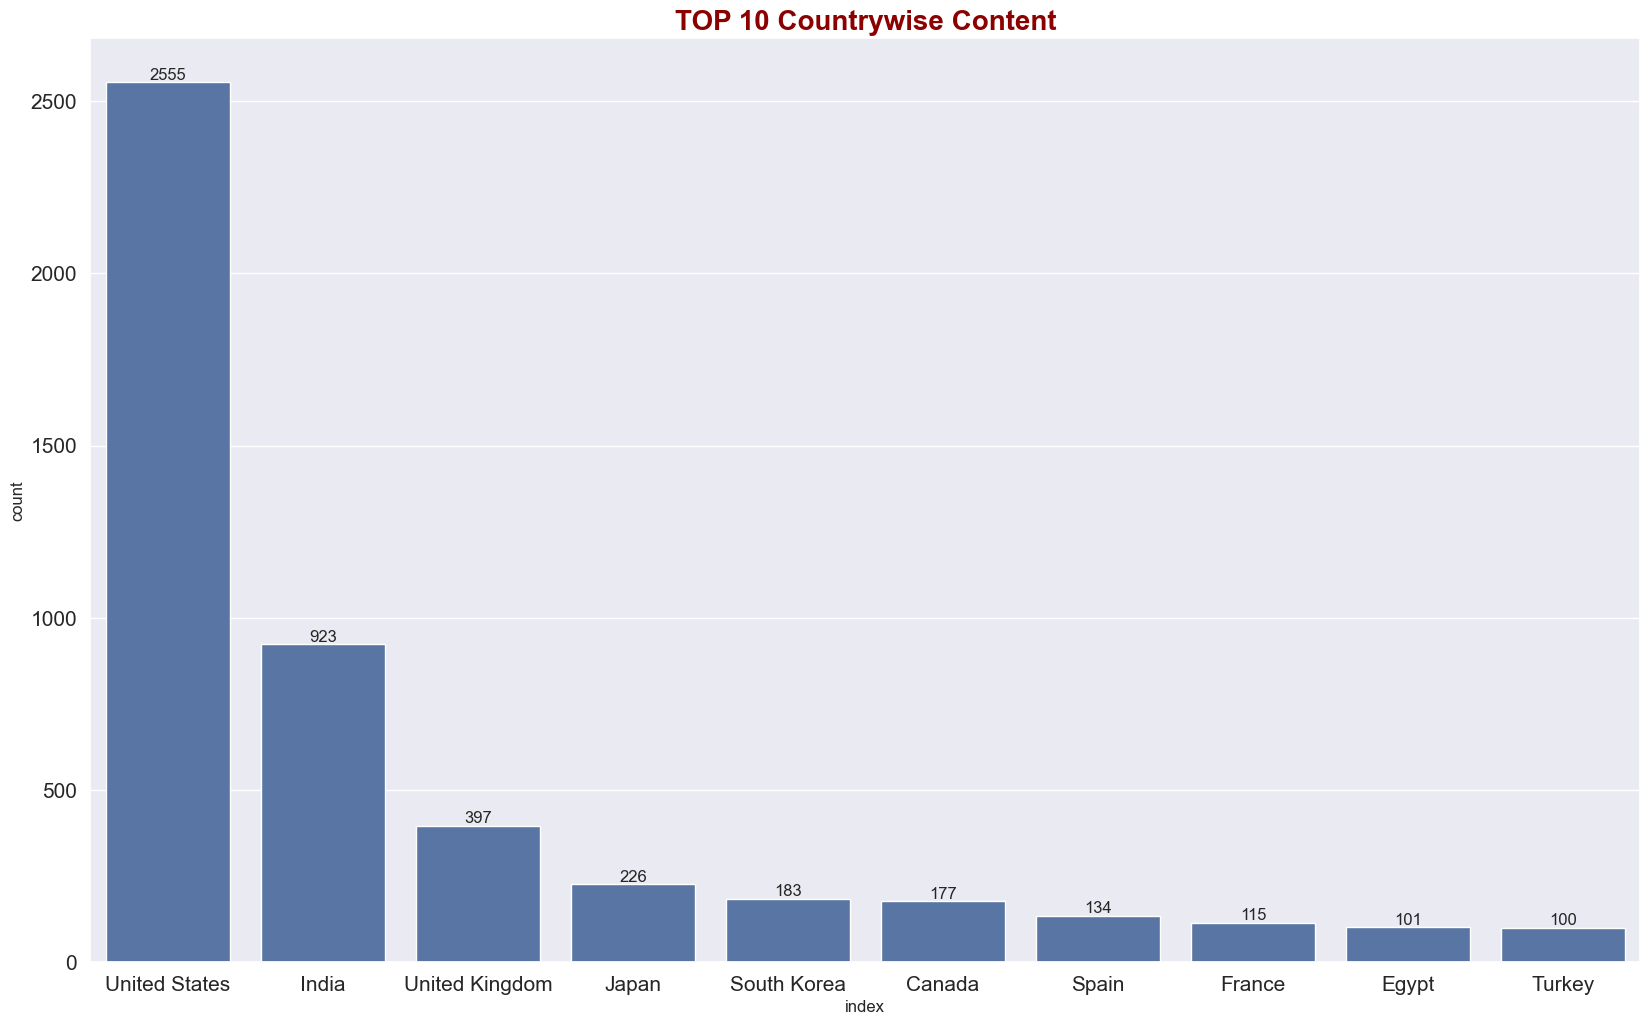

In [10]:
aux = df.country.value_counts().reset_index(name = 'count')
plot.bar(aux[:10], 'index', 'count', 'TOP 10 Countrywise Content', True, None)

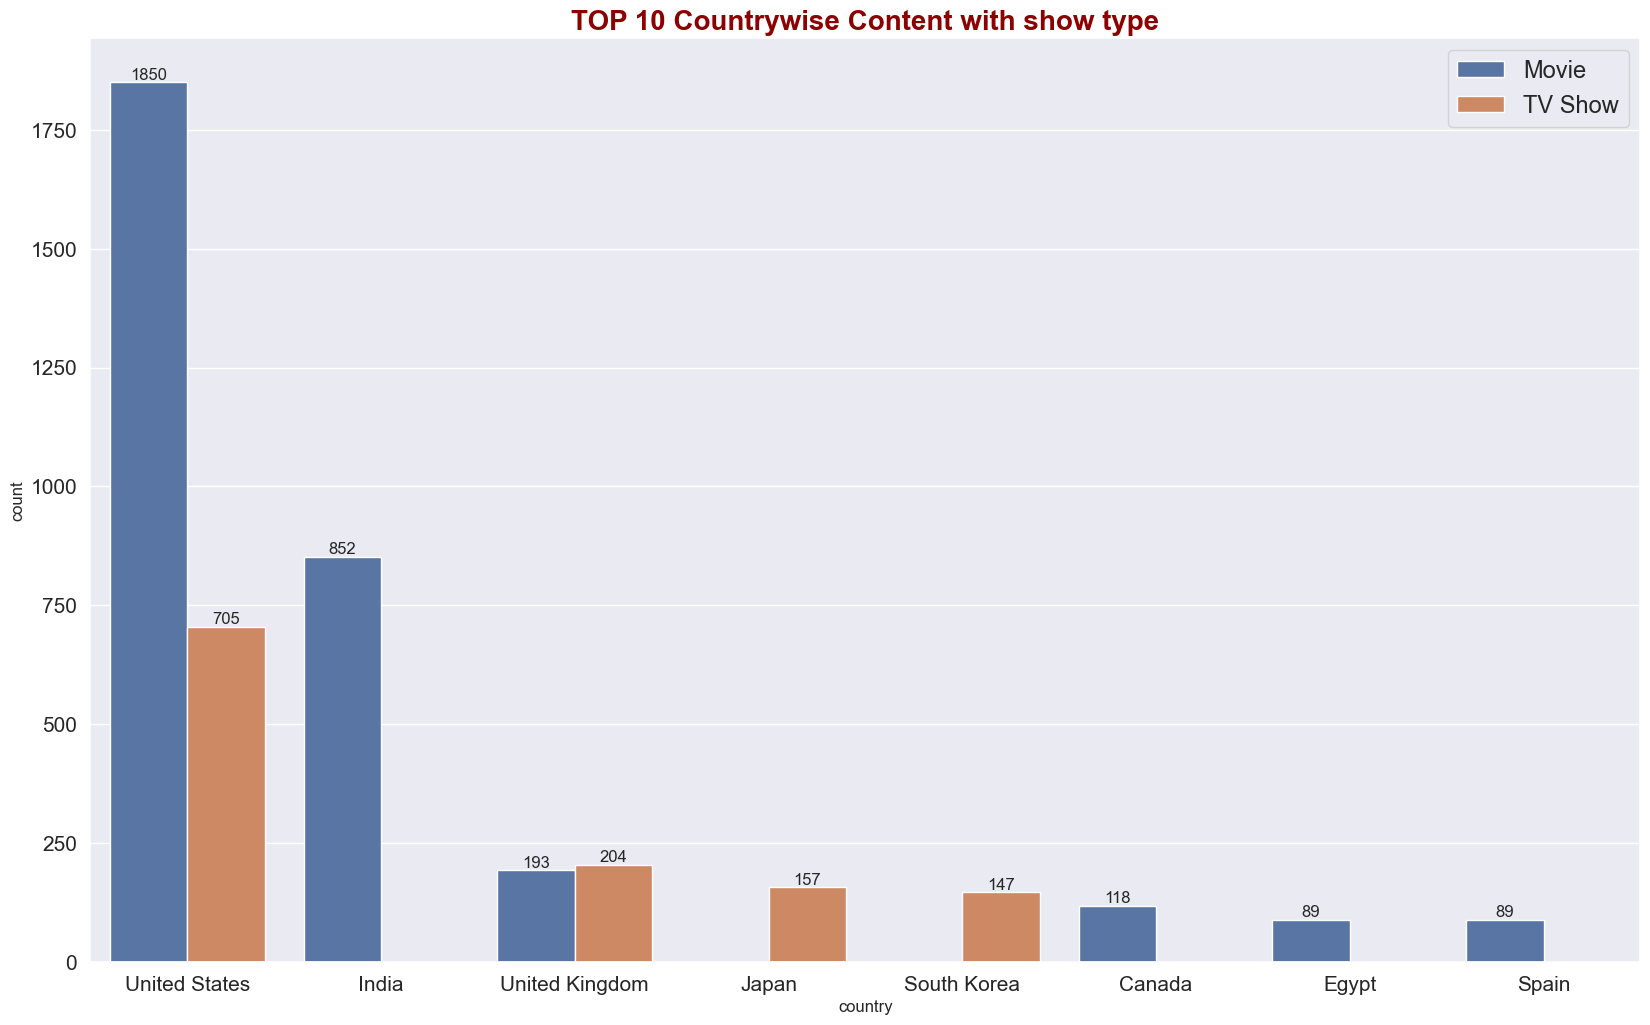

In [11]:
aux = df.groupby(['country', 'type']).title.count().reset_index()
aux.columns = ['country', 'type', 'count']
aux = aux.sort_values(by = 'count', ascending = False)
plot.bar(aux[:10], 'country', 'count', 'TOP 10 Countrywise Content with show type', True, 'type')

In [12]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


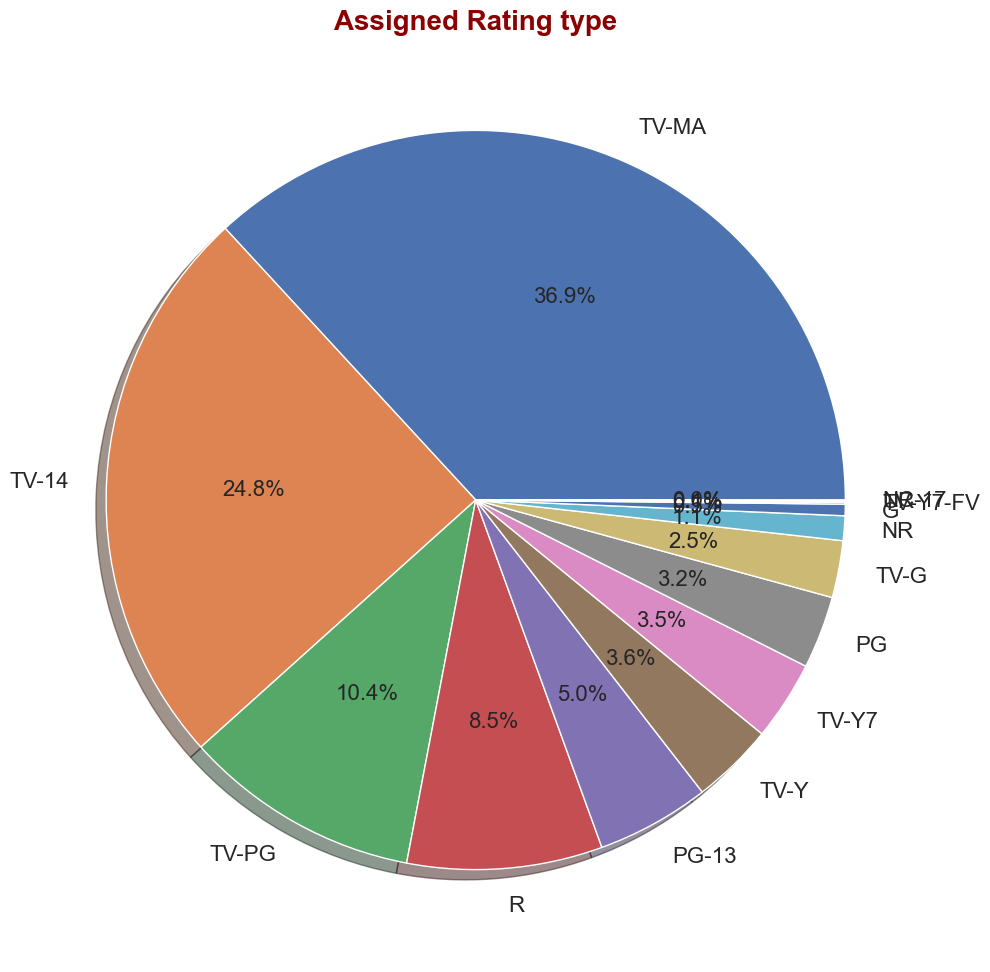

In [13]:
aux = df.rating.value_counts()
plot.pie(aux, aux.index, 'Assigned Rating type')

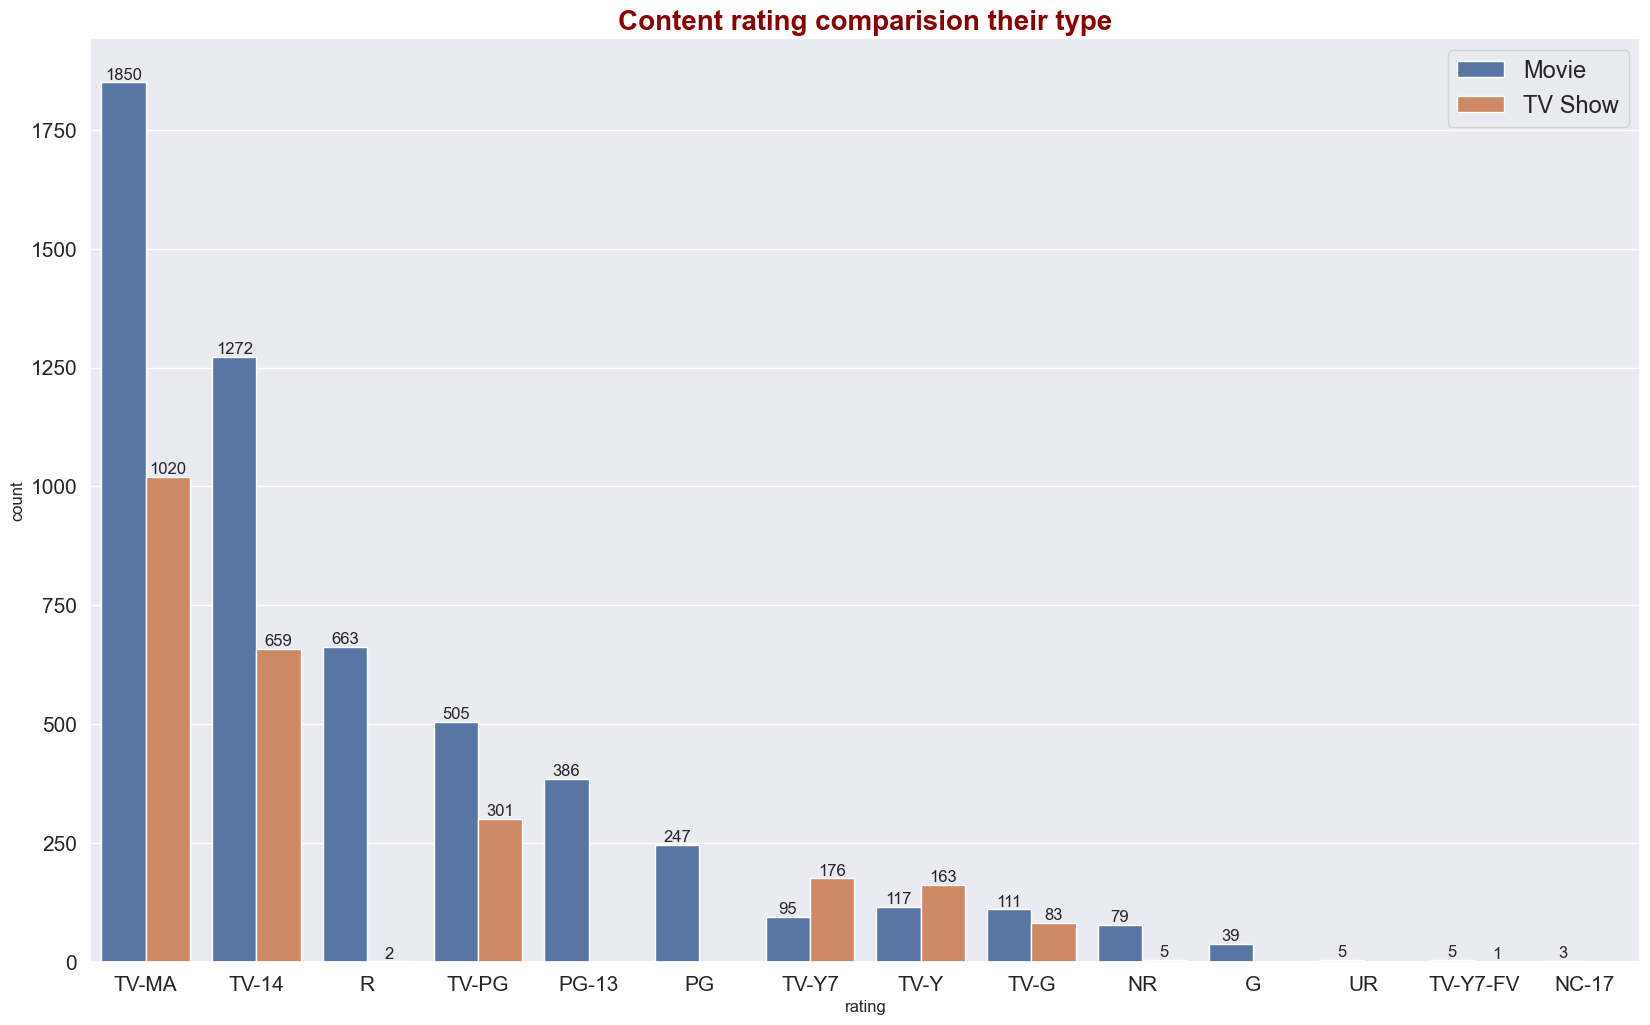

In [14]:
aux = df.groupby(['type', 'rating']).title.count().reset_index()
aux.columns = ['type', 'rating', 'count']
aux = aux.sort_values(by = 'count', ascending= False)
plot.bar(aux, 'rating', 'count', 'Content rating comparision their type', True, 'type')

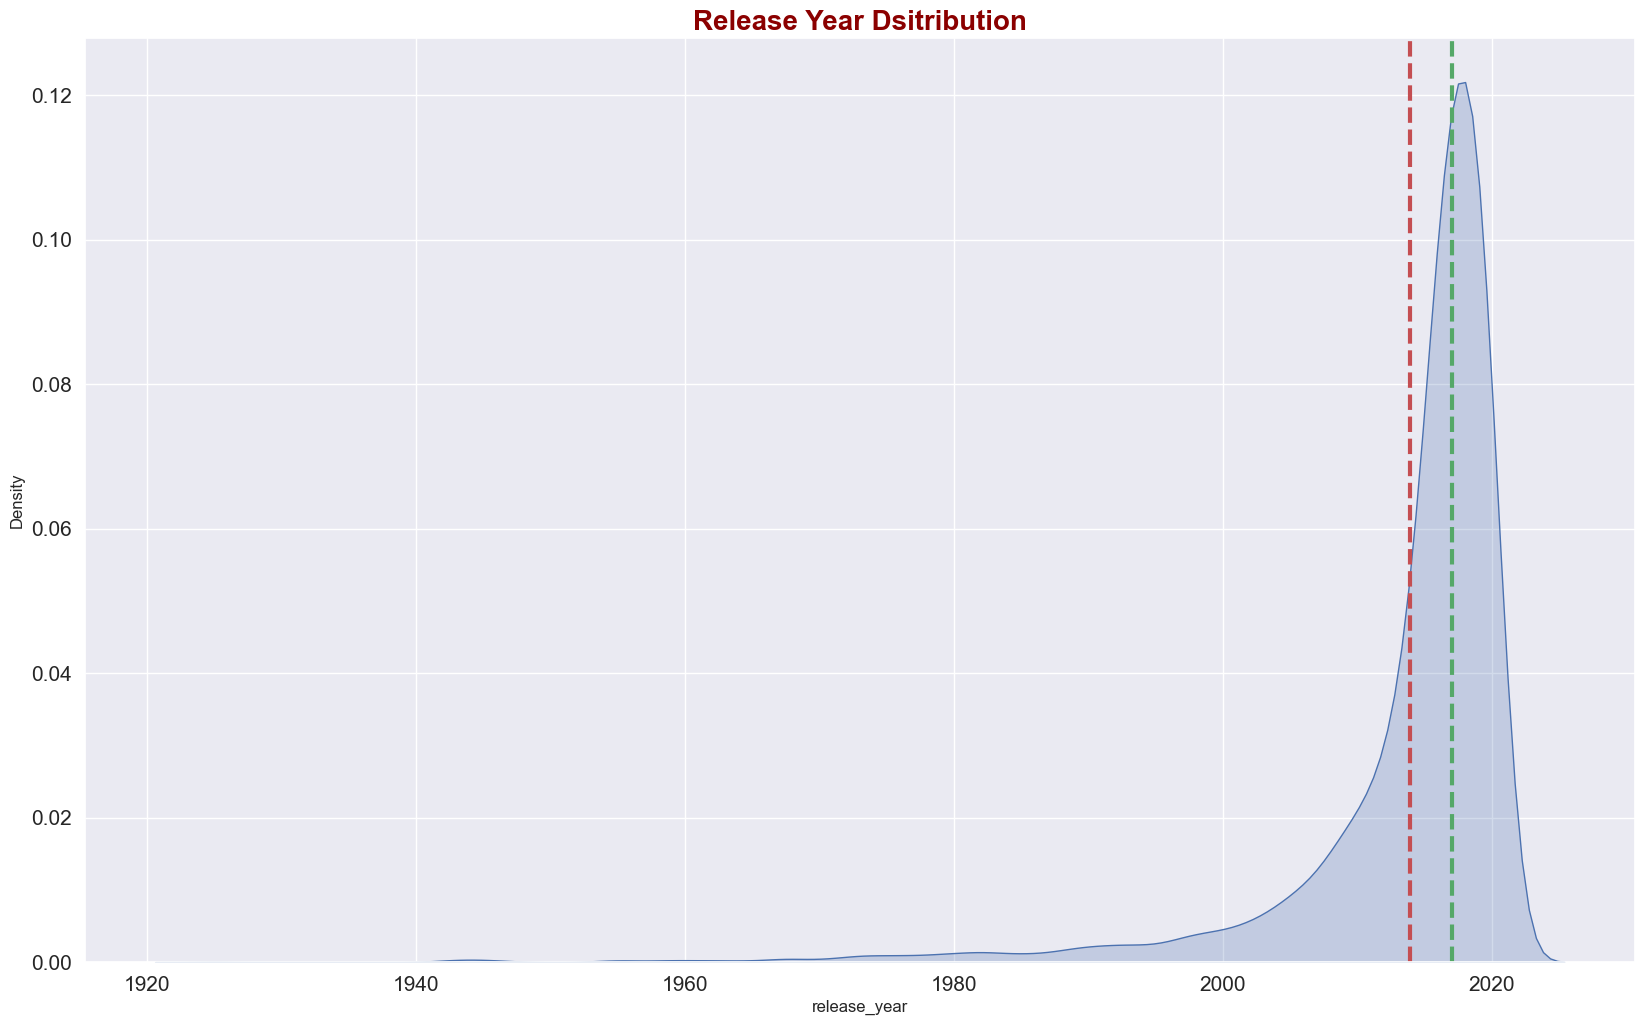

In [15]:
plot.kde(df, 'release_year', 'Release Year Dsitribution', True)

In [16]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


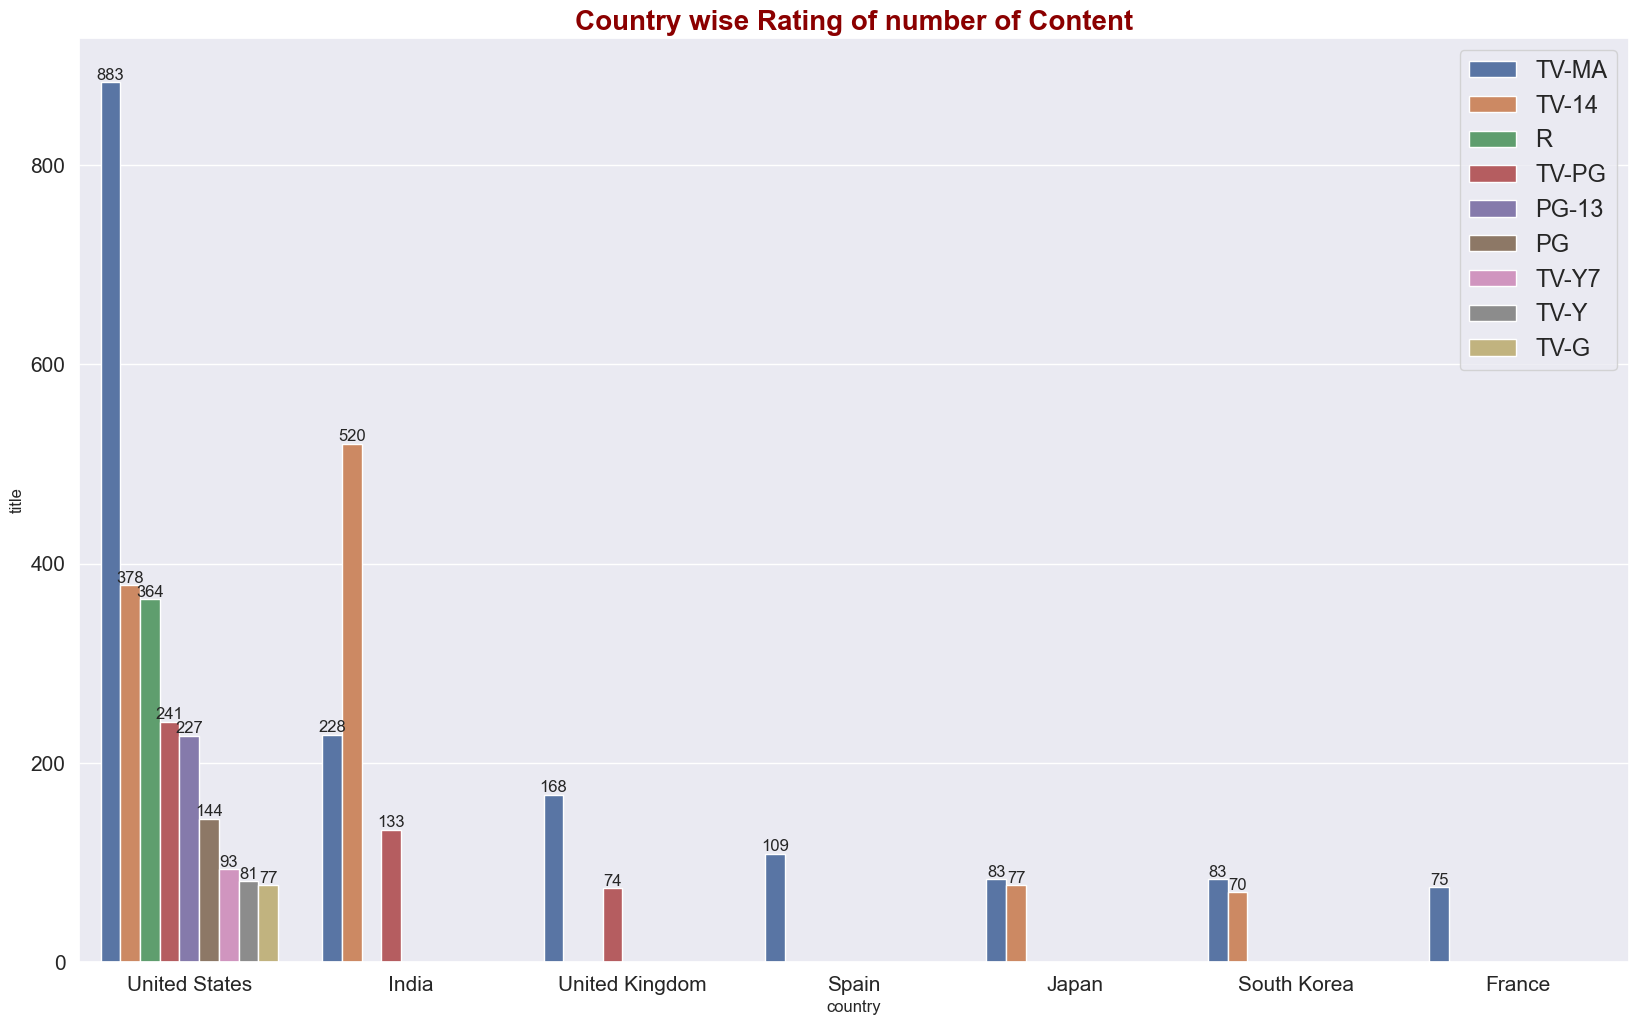

In [17]:
aux = df.groupby(['rating', 'country']).title.count().reset_index()
aux = aux.sort_values(by = 'title', ascending = False)
plot.bar(aux[:20],'country','title', 'Country wise Rating of number of Content', True, 'rating', 0)

In [18]:
df['movie_duration'] = df.duration.apply(lambda x : int(x.split()[0]) if 'min' in x else np.nan)

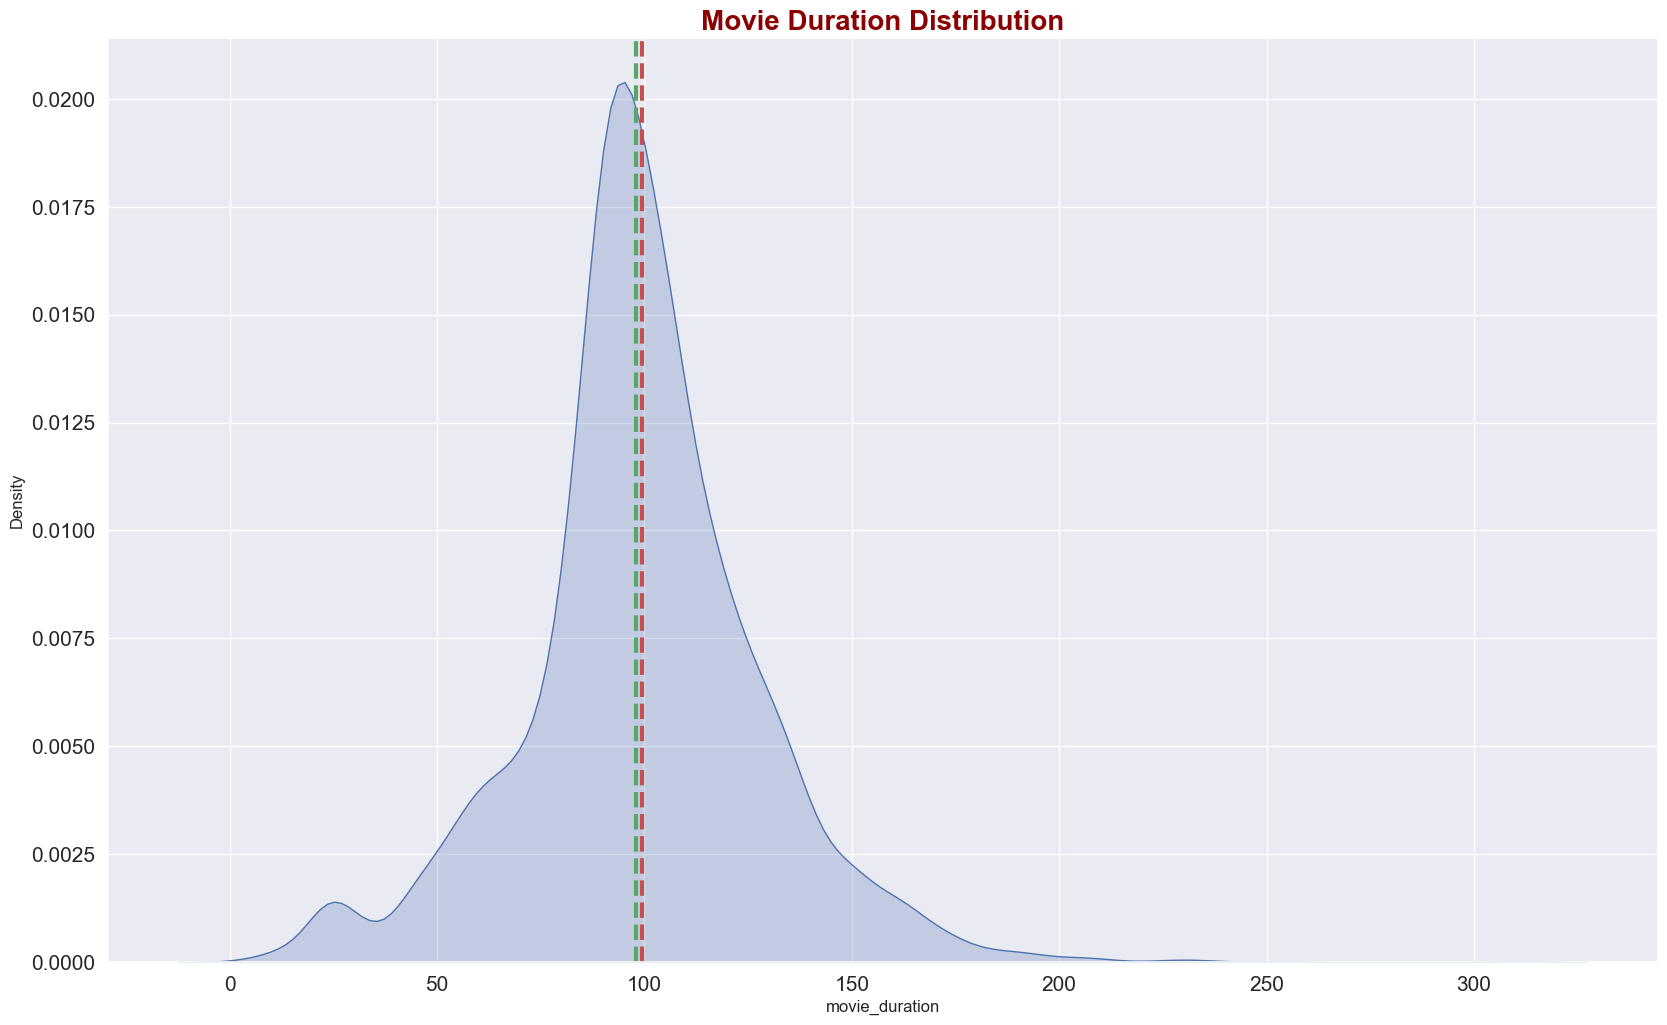

In [19]:
plot.kde(df, 'movie_duration', 'Movie Duration Distribution', True)

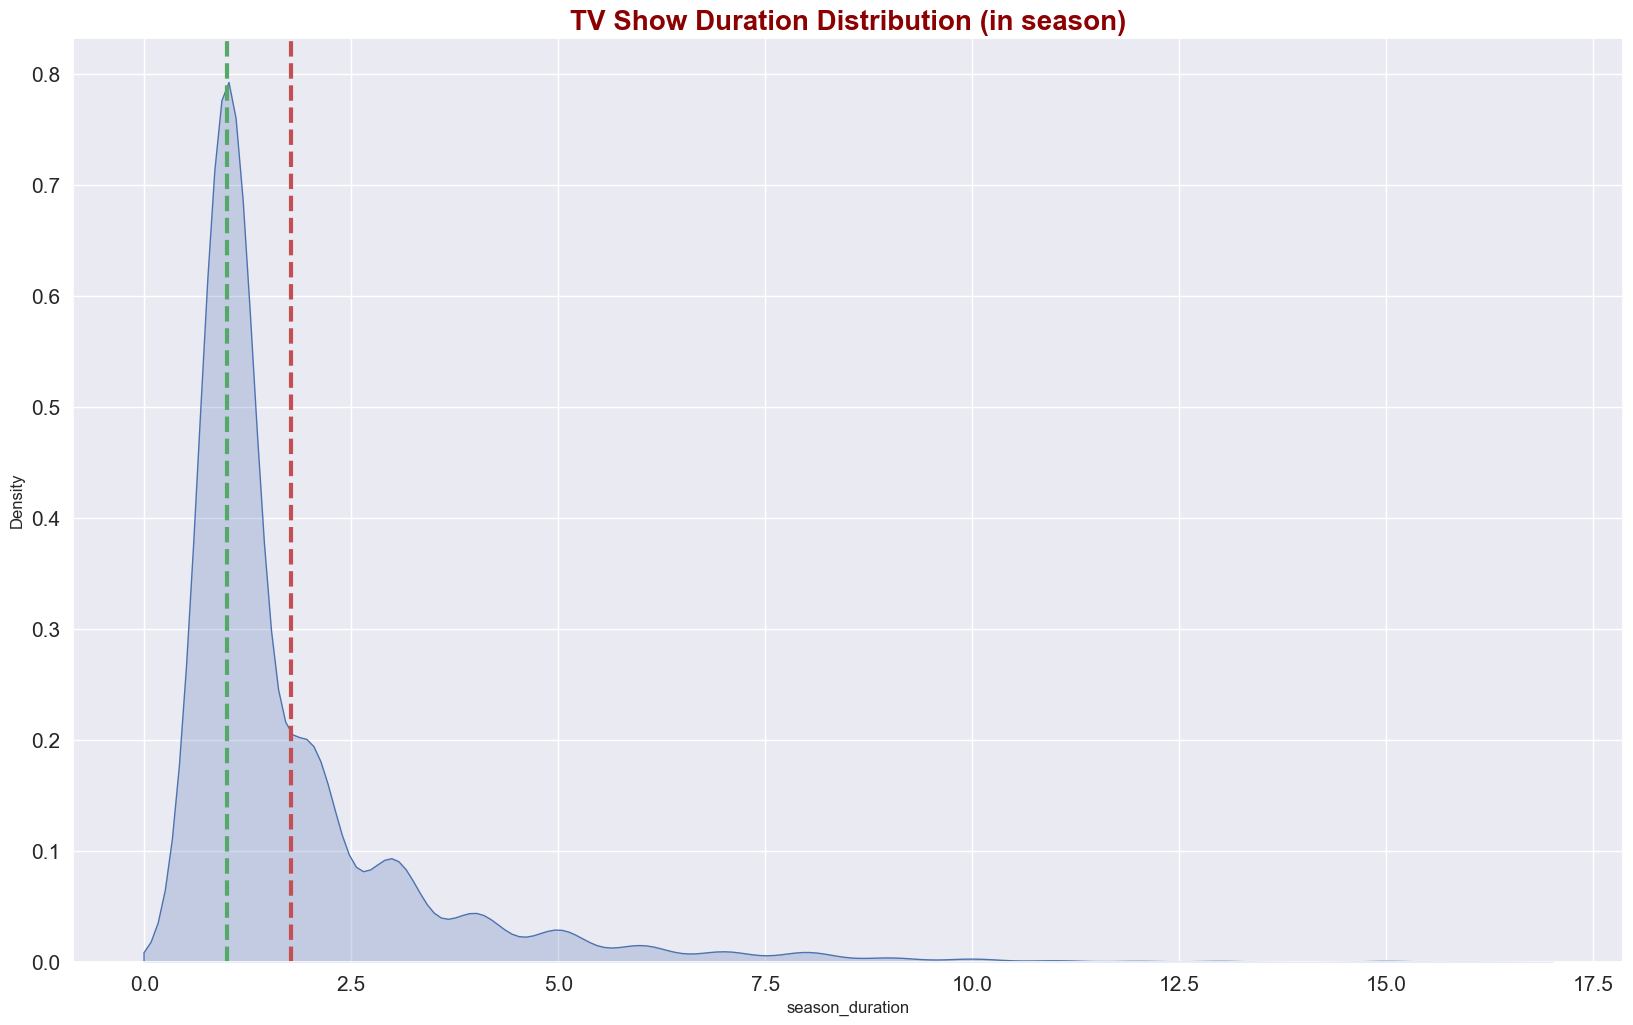

In [20]:
df['season_duration'] = df.duration.apply(lambda x : int(x.split()[0]) if 'Season' in x else np.nan)
plot.kde(df, 'season_duration', 'TV Show Duration Distribution (in season)', True)

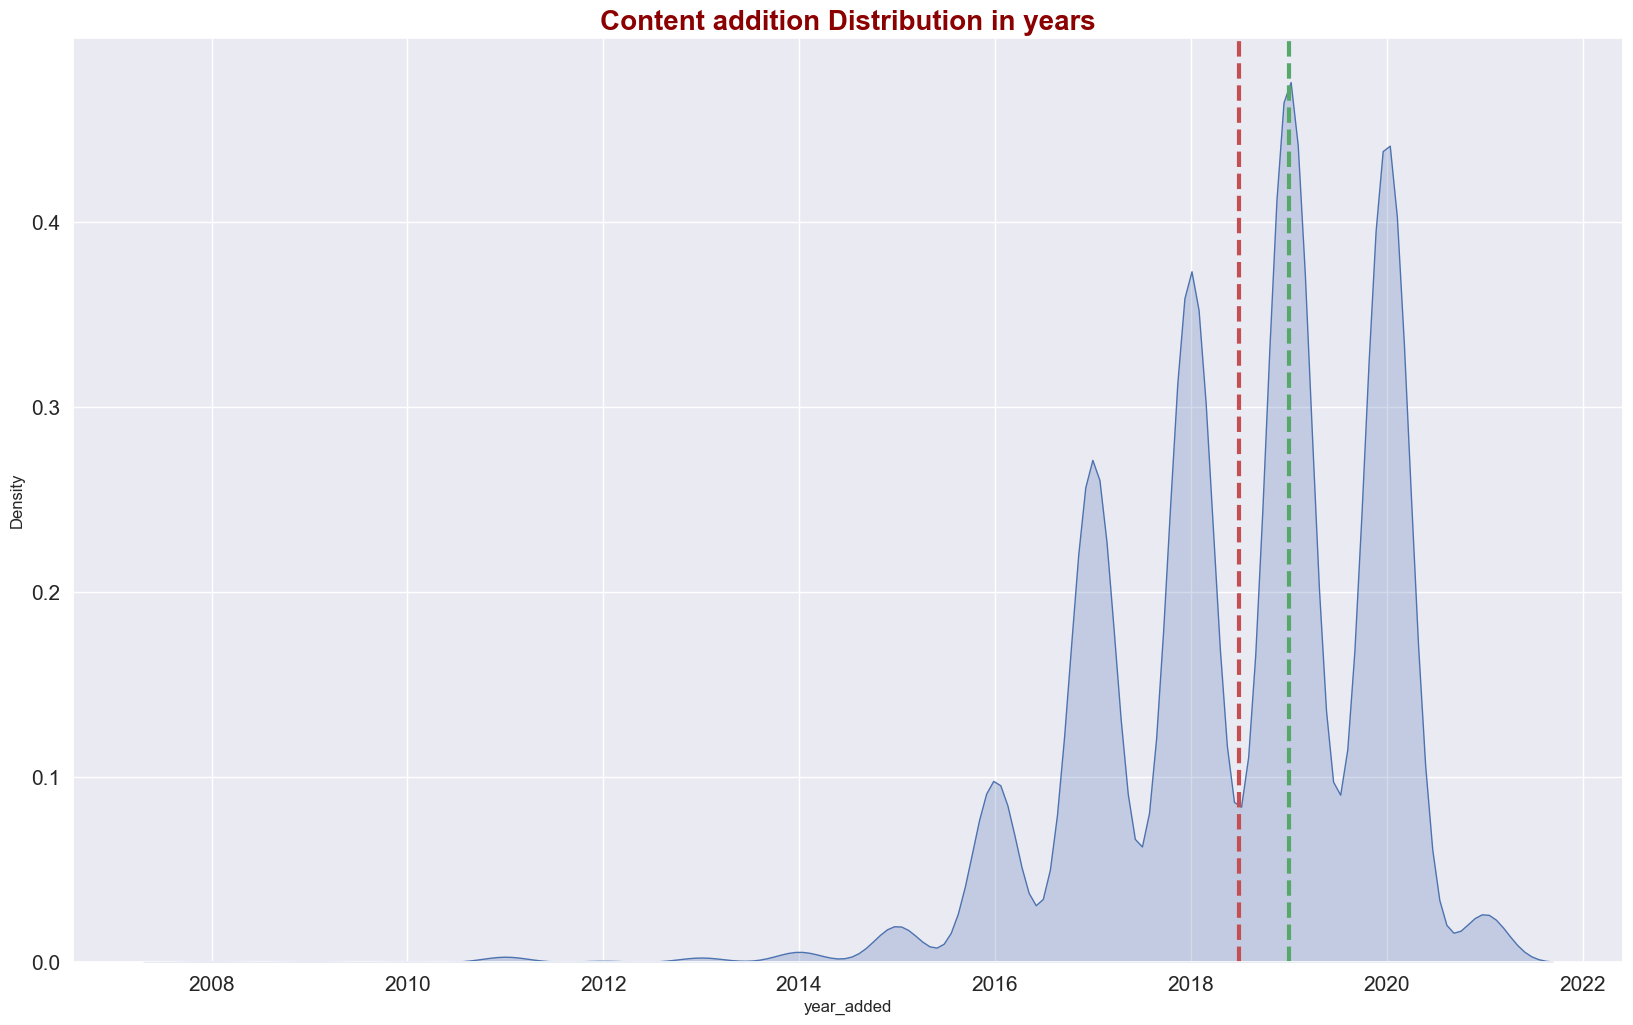

In [21]:
df['year_added'] = df.date_added.apply(lambda x : int(x.split(",")[1]) if type(x) == str else x)
plot.kde(df, 'year_added', 'Content addition Distribution in years', True)

### Seems like they add content every second year

In [45]:
from wordcloud import WordCloud
def create_wordcloud(text, title):
    # Sample text data

    # Generate word cloud
    wordcloud_ = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontdict={'family' : 'sans', 'color' : 'darkred', 'size' : 20, 'weight' : 'bold'})
    plt.show()

<Figure size 2000x1200 with 0 Axes>

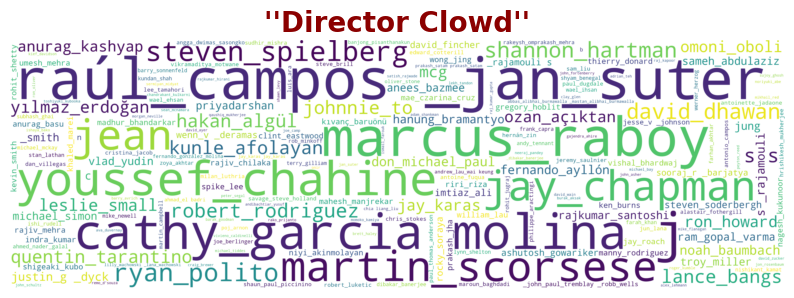

In [44]:
aux = df[df.director != 'Not Found']
aux = aux[aux.director != 'NotFound']

aux['new'] = aux.director.apply(lambda x: "_".join(x.split()))
text = ", ".join(map(str.lower, aux.new))
create_wordcloud(text, "''Director Clowd''")

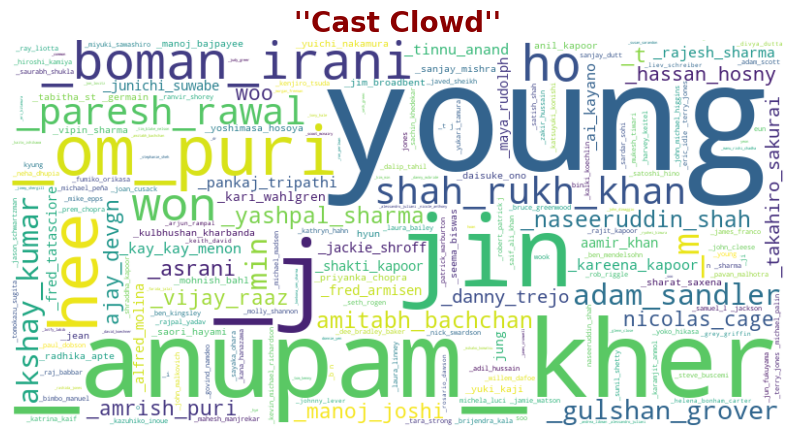

In [34]:
aux = df[df.cast != 'Not Found']
aux = aux[aux.cast != 'NotFound']
aux['new_cast'] = aux.cast.apply(lambda x: "_".join(x.split()))
text = ", ".join(map(str.lower, aux.new_cast))
create_wordcloud(text, "''Cast Clowd''")

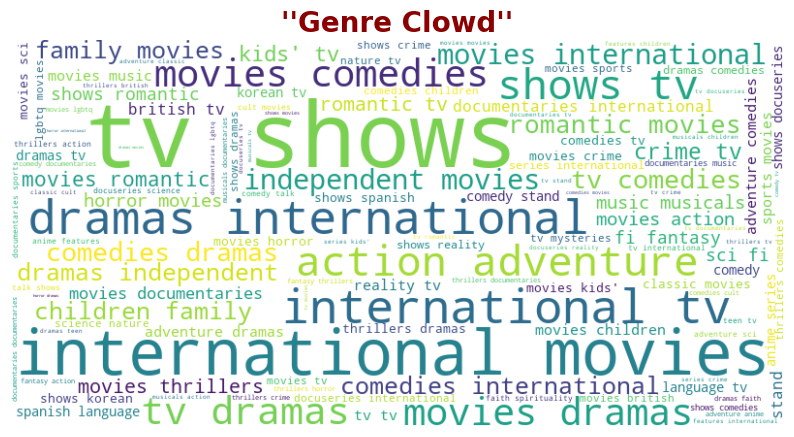

In [36]:
text = ", ".join(map(str.lower, aux.listed_in))
create_wordcloud(text, "''Genre Clowd''")

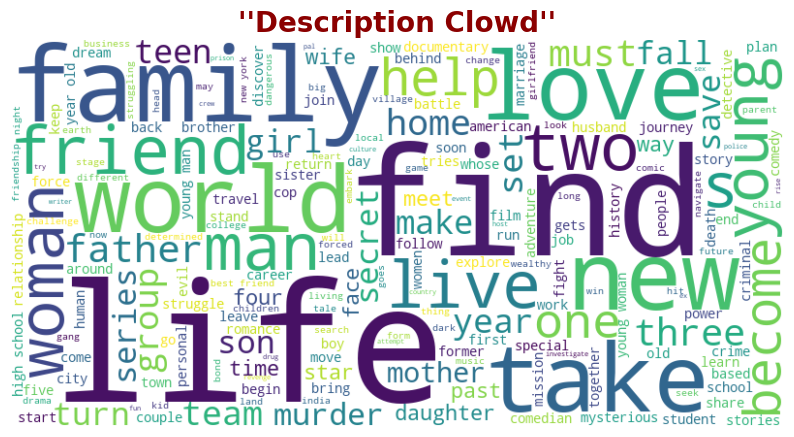

In [38]:
text = " ".join(map(str.lower, aux.description))
create_wordcloud(text, "''Description Clowd''")